In [15]:
import numpy as np

from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy import wcs
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy import units as u

import os
import sys
from tqdm import tqdm
from astropy.table import Table, join, vstack
from astropy.nddata.utils import extract_array

In [43]:
directory_univ = r'/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/'
fnames = [r'Abell_85_aFix_pol_I_Farcsec_fcube_cor.fits', r'Abell_85_aFix_pol_Q_Farcsec_fcube_cor.fits', r'Abell_85_aFix_pol_U_Farcsec_fcube_cor.fits', r'Abell_85_aFix_pol_V_Farcsec_fcube_cor.fits']
stokes_name = ['I', 'Q', 'U', 'V']

for n, fname in enumerate(fnames):
    hdu_cube = fits.open(get_pkg_data_filename(directory_univ+fname))
    cube = hdu_cube[0].data.squeeze() # drops the size-1 axes
    hdu_cube.close()
    
    for i in tqdm(range(12)):
        plane = np.zeros((1,1,3617,3617))
        plane[0,0,:,:] = cube[i]
        hdu_plane = fits.PrimaryHDU(plane)
        hdu_plane.header['SIMPLE'] = hdu_cube[0].header['EXTEND']
        hdu_plane.header['BITPIX'] = -32
        hdu_plane.header['NAXIS'] = 4
        hdu_plane.header['NAXIS1'] = 3617
        hdu_plane.header['NAXIS2'] = 3617
        hdu_plane.header['NAXIS3'] = 1
        hdu_plane.header['NAXIS4'] = 1
        
        hdu_plane.header['CTYPE1'] = 'RA---SIN'
        hdu_plane.header['CDELT1'] = -3.317774E-04
        hdu_plane.header['CRPIX1'] = 1.809000E+03
        hdu_plane.header['CROTA1'] = 0.000000E+00
        hdu_plane.header['CRVAL1'] = 10.45282638889222
        hdu_plane.header['CUNIT1'] = 'deg'
        
        hdu_plane.header['CTYPE2'] = 'DEC--SIN'
        hdu_plane.header['CDELT2'] = 3.317774E-04
        hdu_plane.header['CRPIX2'] = 1.809000E+03
        hdu_plane.header['CROTA2'] = 0.000000E+00
        hdu_plane.header['CRVAL2'] = -9.317925555555556
        hdu_plane.header['CUNIT2'] = 'deg'
        
        hdu_plane.header['CTYPE3'] = 'FREQ'
        hdu_plane.header['CDELT3'] = hdu_cube[0].header['FREH00'+(2-len(str((i+1))))*'0' + str(i+1)]\
                                    -hdu_cube[0].header['FREL00'+(2-len(str((i+1))))*'0' + str(i+1)]
        hdu_plane.header['CRPIX3'] = 1
        hdu_plane.header['CROTA3'] = 0.0
        hdu_plane.header['CRVAL3'] = hdu_cube[0].header['FREQ00'+(2-len(str((i+1))))*'0' + str(i+1)]

        hdu_plane.header['CTYPE4'] = 'STOKES'
        hdu_plane.header['CDELT4'] = 1.0
        hdu_plane.header['CRPIX4'] = 1.0
        hdu_plane.header['CROTA4'] = 0.0
        hdu_plane.header['CRVAL4'] = n+1
        
        hdu_plane.header['OBSRA'] = 1.045291666667E+01
        hdu_plane.header['OBSDEC'] = -9.318000000000E+00
        hdu_plane.header['OBJECT'] = 'A85'
        hdu_plane.header['TELESCOP'] = 'MeerKAT'
        hdu_plane.header['INSTRUME'] = 'MeerKAT'
        hdu_plane.header['OBSERVER'] = 'Sharmila'
        hdu_plane.header['DATE-OBS'] = '2018-09-25'
        hdu_plane.header['DATE-MAP'] = '2020-08-15'
        hdu_plane.header['ORIGIN'] = 'Obit'
        hdu_plane.header['EPOCH'] = 2.000000E+03
        hdu_plane.header['EQUINOX'] = 2000.0
        hdu_plane.header['DATAMAX'] = 2.99980617E+00
        hdu_plane.header['DATAMIN'] = -2.99998784E+00
        hdu_plane.header['BUNIT'] = 'JY/BEAM'
        hdu_plane.header['ALTRPIX'] = 1.000000E+00
        hdu_plane.header['CLEANBMJ'] = 2.140992E-03
        hdu_plane.header['CLEANBMN'] = 1.972343E-03
        hdu_plane.header['CLEANBPA'] = -8.240263E+00
        hdu_plane.header['CLEANNIT'] = 251644  
        hdu_plane.header['ALPHA'] = 0.000000000000E+00
        hdu_plane.header['RFALPHA'] = 1.283791015625E+09
        hdu_plane.header['RADESYS'] = 'FK5'
        hdu_plane.header['BMAJ'] = 0.002140992
        hdu_plane.header['BMIN'] = 0.001972343
        hdu_plane.header['BPA'] = -8.240263000000001  

        hdu_plane.writeto(directory_univ+stokes_name[n]+'_slices/Abell_85_'+stokes_name[n]+'_plane_freq'+(2-len(str((i+1))))*'0' + str(i+1)+'.fits', overwrite=True)

100%|██████████| 12/12 [01:52<00:00,  9.35s/it]


In [44]:
import pyfits
test = pyfits.getdata('/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/Q_slices/Abell_85_Q_plane_freq03.fits')
test2 = pyfits.getdata('/net/voorrijn/data2/osinga/pipeline/cubes/19906/G080.99-50.90/stokes_q/G080.99-50.90_0000-Q-image.pbcor.smoothed.fits')

(1, 1, 2736, 2736)


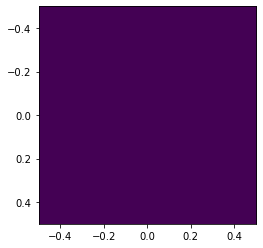

[[-3.76975186e-05]]
(1, 1, 3617, 3617)
(1, 1, 2736, 2736)


In [45]:
import matplotlib.pyplot as plt

print(np.shape(test2))
plt.imshow(plane[:,:,0,0], vmin=0,vmax=1e-4)
plt.show()

print(plane[:,:,0,0])
print(np.shape(plane))
print(np.shape(test2))